<a href="https://colab.research.google.com/github/Omarkouta73/RAG-Applications-In-Web-Data-Extraction/blob/main/Vision/RAG_on_signle_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pdf2image
!pip install faiss-cpu
!pip install openai-clip
!apt-get update
!apt-get install -y poppler-utils

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.5 MB/s eta 0:00:00
  Created wheel for openai-clip: filename=openai_clip-1.0.1-py3-none-any.whl size=1368605 sha256=8552f5c71172892fbabdaf7d1bdb7e0e88d87995e9a4ef5d3ea4eecbf41c3b51
  Stored in directory: /root/.cache/pip/wheels/0d/17/90/042948fd2e2a87f1dcf6db6d438cad015c49db0c53d1d9c7dc
Successfully built openai-clip
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://ppa.launchpadcontent.

In [ ]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os

In [ ]:
# from selenium import webdriver
# import time

# # Set up the driver (configure for headless mode if needed)
# options = webdriver.ChromeOptions()
# options.add_argument('--headless=new')  # Recommended for larger screenshots
# driver = webdriver.Chrome(options=options)

# # Navigate to the target URL
# driver.get('https://example.com')

# # Calculate total height of the page
# total_height = driver.execute_script(
#     "return Math.max(document.body.scrollHeight, "
#     "document.documentElement.scrollHeight, "
#     "document.body.offsetHeight, "
#     "document.documentElement.offsetHeight, "
#     "document.documentElement.clientHeight);"
# )

# # Get current window width
# window_width = driver.execute_script("return window.innerWidth;")

# # Resize the window to capture full page
# driver.set_window_size(window_width, total_height)

# # Short pause to ensure rendering after resize
# time.sleep(1)

# # Save the screenshot
# driver.save_screenshot('full_page_screenshot.png')

# # Close the browser
# driver.quit()

# Fixed Splitting

In [ ]:
def split_image(image_path, rows=3, cols=3):
    # Read image with OpenCV
    img = cv2.imread(image_path)
    # Convert to RGB color space
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Calculate tile dimensions
    h, w, _ = img.shape
    tile_h, tile_w = h // rows, w // cols

    image_batches = []
    for r in range(rows):
        for c in range(cols):
            x_start, y_start = c * tile_w, r * tile_h
            x_end, y_end = (c + 1) * tile_w, (r + 1) * tile_h

            # Convert numpy array to PIL Image
            tile = Image.fromarray(img[y_start:y_end, x_start:x_end])
            image_batches.append(tile)

    return image_batches

In [ ]:
batches_f = split_image("/content/laptopamazon.png")
# for img in batches_f:
#   plt.imshow(img)
#   plt.show()

# Content Based Splitting

## Layout parser

In [ ]:
!pip install layoutparser
!pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 52.4 MB/s eta 0:00:00
  Created wheel for iopath: filename=iopath-0.1.10-py3-none-any.whl size=31528 sha256=fb522e73448a1cde28c5a9cc5c07ced996081302dc95b604b5f445701ae5f8ff
  Stored in directory: /root/.cache/pip/wheels/ba/5e/16/6117f8fe7e9c0c161a795e10d94645ebcf301ccbd01f66d8ec
Successfully built iopath
  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-olz1_alg/detectron2_7f5a

In [ ]:
import layoutparser as lp

def adaptive_split(image_path):
    image = cv2.imread(image_path)

    # Load a pre-trained layout detection model
    model = lp.models.Detectron2LayoutModel(
        'lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
        extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
        label_map={0: "Text", 1: "Title", 2: "Table", 3: "Figure"}
    )

    # Detect layout elements
    layout = model.detect(Image.open(image_path))

    # Crop detected blocks and convert to PIL images
    image_batches = []
    for block in layout:
        x1, y1, x2, y2 = map(int, block.coordinates)
        crop = image[y1:y2, x1:x2]

        # Convert OpenCV image (BGR) to PIL format (RGB)
        crop_pil = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
        image_batches.append(crop_pil)

    return image_batches

In [ ]:
batches_lp = adaptive_split("/content/laptopamazon.png")
# for img in batches_lp:
#   plt.imshow(img)
#   plt.show()

config.yml?dl=1: 8.19kB [00:01, 6.46kB/s]
model_final.pth?dl=1: 330MB [00:16, 20.4MB/s]                           
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


## OCR

In [ ]:
!apt-get update
!apt-get install -y tesseract-ocr
!pip install pytesseract

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
import pytesseract
from pytesseract import Output

pytesseract.pytesseract.tesseract_cmd = "/usr/bin/tesseract"

def ocr_based_split(image_path):
    image = cv2.imread(image_path)
    data = pytesseract.image_to_data(image, output_type=Output.DICT)
    image_batches = []
    for i in range(len(data["text"])):
        if int(data["conf"][i]) > 50:  # Confidence threshold
            x, y, w, h = data["left"][i], data["top"][i], data["width"][i], data["height"][i]
            crop = image[y:y+h, x:x+w]

            # Convert OpenCV BGR image to PIL RGB
            crop_pil = Image.fromarray(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
            image_batches.append(crop_pil)

    return image_batches


In [ ]:
batches_ocr = ocr_based_split("/content/laptopamazon.png")
# for img in batches_ocr:
#   plt.imshow(img)
#   plt.show()

# RAG

## CLIP

In [ ]:
import torch
import clip
from PIL import Image
from pdf2image import convert_from_path
import faiss
import numpy as np
import time


# Load CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def initialize(batches):
    batch_embeddings = []
    times = []
    for img in batches:
        start_time = time.time()
        image = preprocess(img).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = model.encode_image(image).cpu().numpy()
        batch_embeddings.append(embedding)
        end_time = time.time()
        times.append((end_time - start_time) * 1000)  # Convert to milliseconds

    batch_embeddings = np.vstack(batch_embeddings)

    # Build FAISS index (cosine similarity)
    index = faiss.IndexFlatIP(batch_embeddings.shape[1])
    index.add(batch_embeddings)

    print(f"Average processing time per batch: {np.mean(times):.2f} ms")
    return index

# Query example
def prompt(query, index, batches, k=3):
    start_time = time.time()
    with torch.no_grad():
        text_embedding = model.encode_text(clip.tokenize(query).to(device)).cpu().numpy()
    distances, indices = index.search(text_embedding, k)
    end_time = time.time()

    query_time = (end_time - start_time) * 1000  # Convert to milliseconds
    print(f"Query execution time: {query_time:.2f} ms")

    top_pages = [indices[0][i] + 1 for i in range(k)]
    print(f"Top {k} batches: {top_pages}")
    for i in top_pages:
        plt.imshow(batches[i-1])
        plt.show()

100%|███████████████████████████████████████| 338M/338M [00:05<00:00, 66.4MiB/s]


### On fixed splitting

In [ ]:
index = initialize(batches_f)

Average processing time per batch: 34.66 ms


Query execution time: 43.75 ms
Top 3 batches: [np.int64(4), np.int64(1), np.int64(2)]


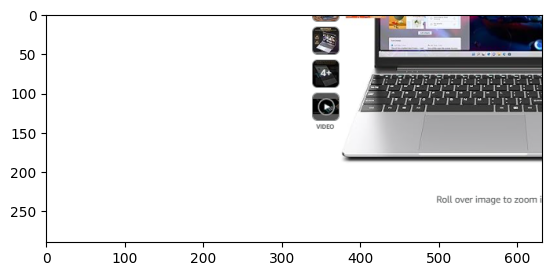

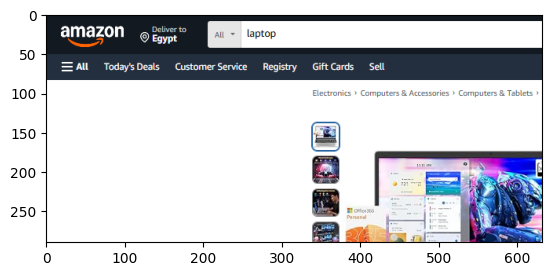

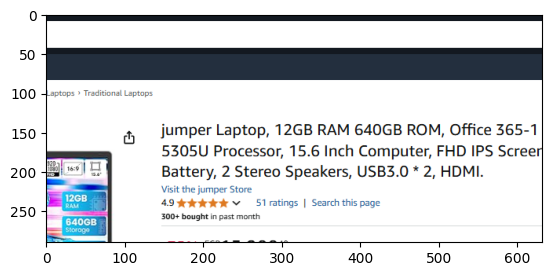

In [ ]:
prompt("Where is the laptop ?", index, batches_f, k=3)

Query execution time: 20.33 ms
Top 3 batches: [np.int64(7), np.int64(9), np.int64(4)]


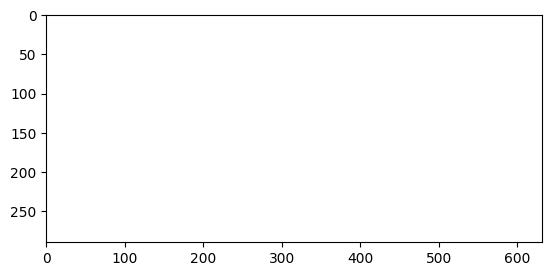

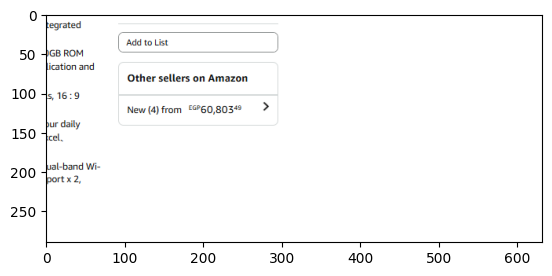

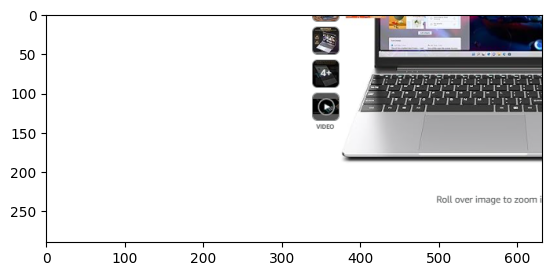

In [ ]:
prompt("Where is the Xbox controller price ?", index, batches_f, k=3)

Query execution time: 54.26 ms
Top 3 batches: [np.int64(9), np.int64(7), np.int64(1)]


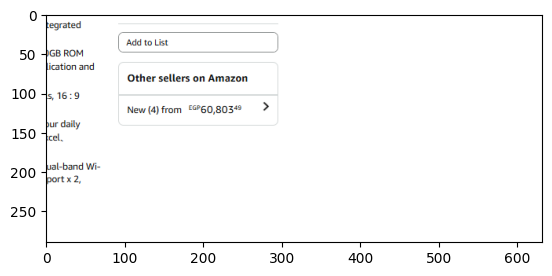

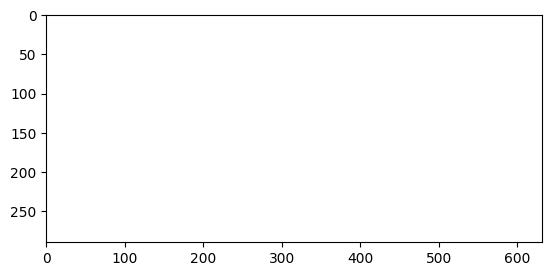

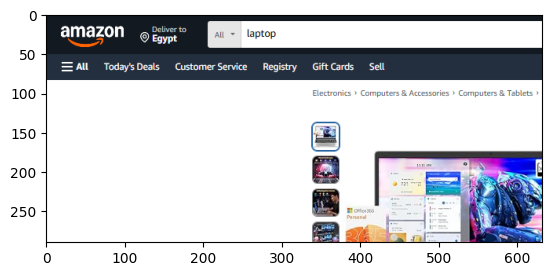

In [ ]:
prompt("Where is the delivery fees ?", index, batches_f, k=3)

### On layout parser

In [ ]:
index = initialize(batches_lp)

Average processing time per batch: 26.34 ms


Query execution time: 37.99 ms
Top 3 batches: [np.int64(4), np.int64(2), np.int64(5)]


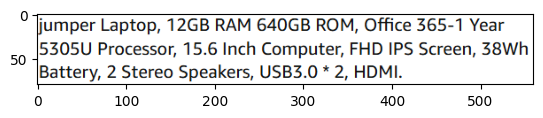

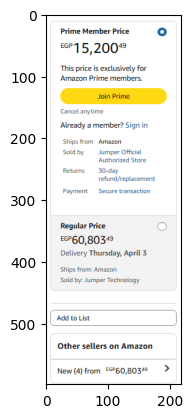

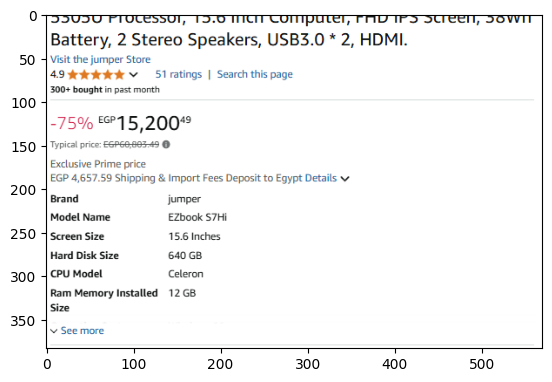

In [ ]:
prompt("Where is the product title ?", index, batches_lp, k=3)

Query execution time: 24.74 ms
Top 3 batches: [np.int64(4), np.int64(2), np.int64(5)]


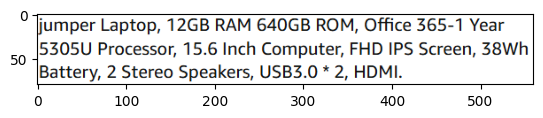

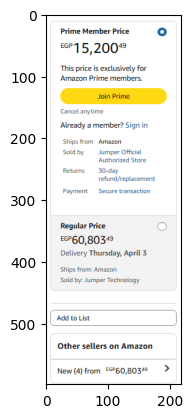

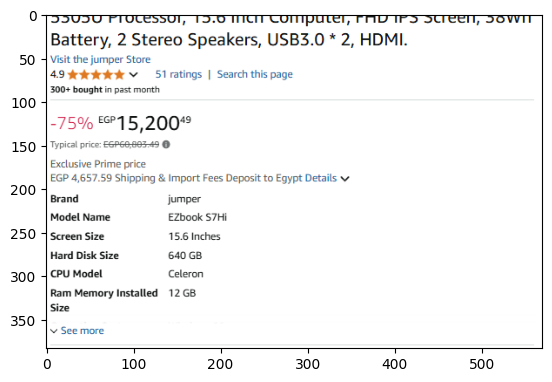

In [ ]:
prompt("Where is the product price ?", index, batches_lp, k=3)

Query execution time: 13.57 ms
Top 3 batches: [np.int64(4), np.int64(3), np.int64(1)]


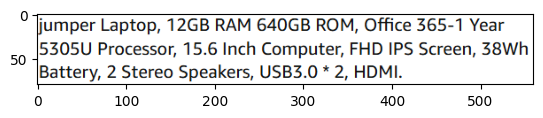

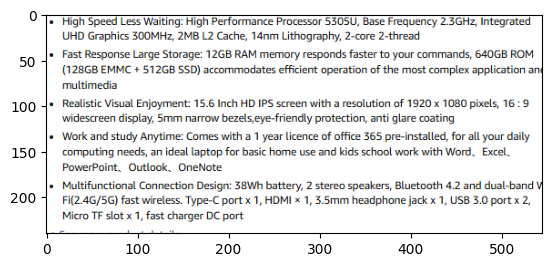

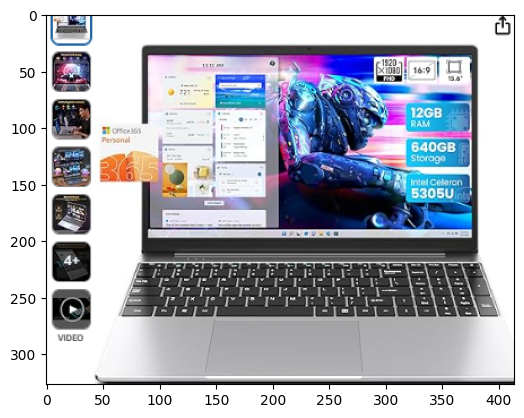

In [ ]:
prompt("screen resolution", index, batches_lp, k=3)

### On OCR

In [ ]:
index = initialize(batches_ocr)

Average processing time per batch: 11.18 ms


Query execution time: 12.76 ms
Top 3 batches: [np.int64(22), np.int64(37), np.int64(209)]


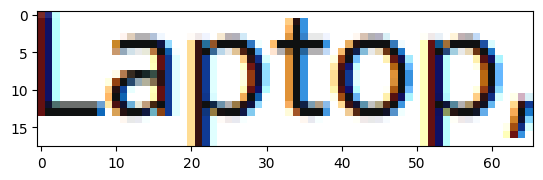

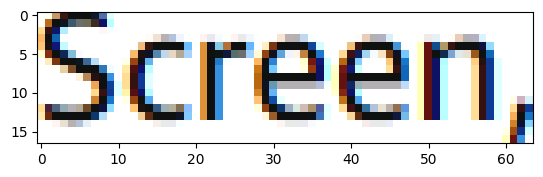

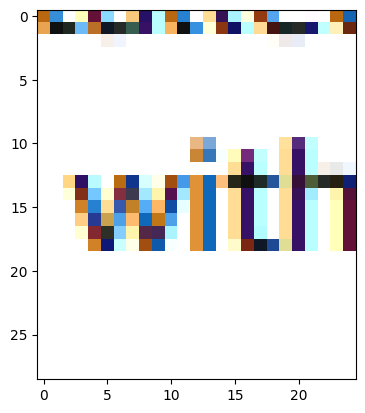

In [ ]:
prompt("Where is the title ?", index, batches_ocr, k=3)

Query execution time: 14.00 ms
Top 3 batches: [np.int64(276), np.int64(63), np.int64(209)]


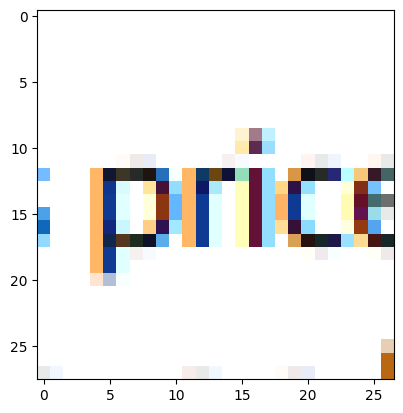

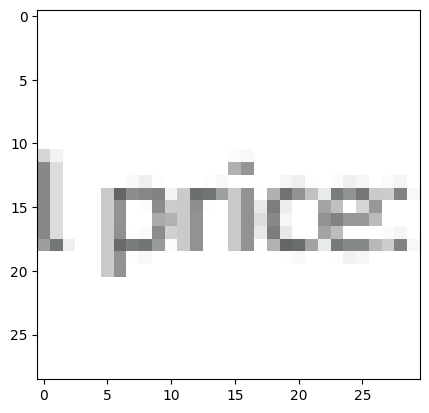

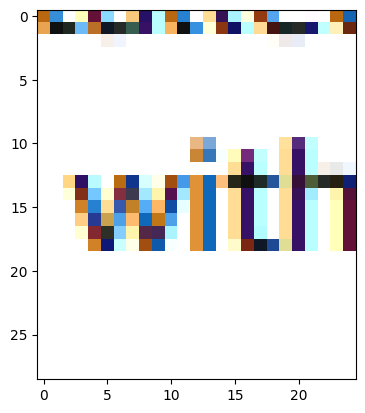

In [ ]:
prompt("price ?", index, batches_ocr, k=3)

Query execution time: 14.97 ms
Top 3 batches: [np.int64(188), np.int64(37), np.int64(31)]


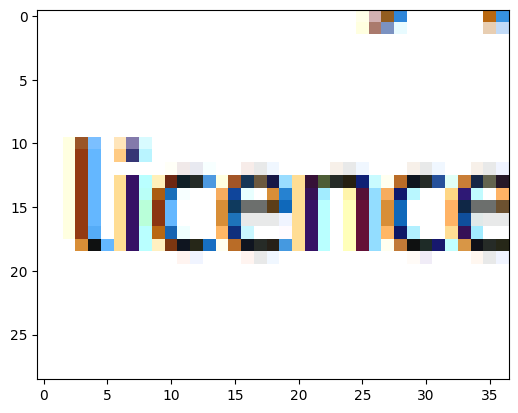

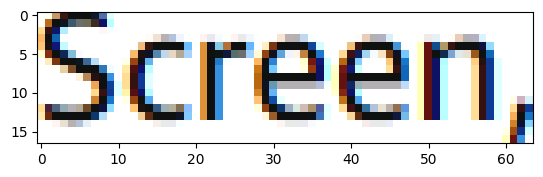

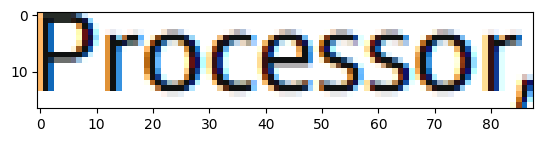

In [ ]:
prompt("licence ?", index, batches_ocr, k=3)

## VisRAG

In [ ]:
from transformers import AutoModel, AutoTokenizer
import torch
import torch.nn.functional as F
from PIL import Image
import requests
from io import BytesIO


# Helper: weighted mean pooling over token representations
def weighted_mean_pooling(hidden, attention_mask):
    attention_mask_ = attention_mask * attention_mask.cumsum(dim=1)
    s = torch.sum(hidden * attention_mask_.unsqueeze(-1).float(), dim=1)
    d = attention_mask_.sum(dim=1, keepdim=True).float()
    reps = s / d
    return reps



# Function to encode either text or image inputs.
@torch.no_grad()
def encode(inputs_list):
    # If the input is a list of strings, we assume it's text.
    if isinstance(inputs_list[0], str):
        model_inputs = {
            "text": inputs_list,
            "image": [None] * len(inputs_list),
            "tokenizer": tokenizer,
        }
    # Otherwise, we assume it's a list of PIL Images.
    else:
        model_inputs = {
            "text": [''] * len(inputs_list),
            "image": inputs_list,
            "tokenizer": tokenizer,
        }
    outputs = model(**model_inputs)
    hidden = outputs.last_hidden_state
    attention_mask = outputs.attention_mask
    reps = weighted_mean_pooling(hidden, attention_mask)
    embeddings = F.normalize(reps, p=2, dim=1).detach().cpu().numpy()
    return embeddings

# Load VisRAG-Ret from Hugging Face
model_name_or_path = "openbmb/VisRAG-Ret"
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path, trust_remote_code=True)
model = AutoModel.from_pretrained(model_name_or_path,
                                  torch_dtype=torch.bfloat16,
                                  trust_remote_code=True).cuda()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/3.38k [00:00<?, ?B/s]

tokenizer.py:   0%|          | 0.00/983 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/VisRAG-Ret:
- tokenizer.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.model:   0%|          | 0.00/1.99M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/765 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/6.20M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.13k [00:00<?, ?B/s]

configuration_minicpm.py:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/VisRAG-Ret:
- configuration_minicpm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_visrag_ret.py:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

modeling_minicpmv.py:   0%|          | 0.00/21.0k [00:00<?, ?B/s]

resampler.py:   0%|          | 0.00/5.61k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/VisRAG-Ret:
- resampler.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_minicpm.py:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openbmb/VisRAG-Ret:
- modeling_minicpm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/VisRAG-Ret:
- modeling_minicpmv.py
- resampler.py
- modeling_minicpm.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/openbmb/VisRAG-Ret:
- modeling_visrag_ret.py
- modeling_minicpmv.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/54.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

MiniCPMForCausalLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
model.eval()
def prompt(queries, instruction, batches, k=3):
    start_time = time.time()
    queries = [instruction + query for query in queries]
    embeddings_query = encode(queries)
    embeddings_doc = encode(batches)
    scores = embeddings_query @ embeddings_doc.T
    end_time = time.time()

    processing_time = (end_time - start_time) * 1000  # Convert to milliseconds
    print(f"Processing time for queries: {processing_time:.2f} ms")

    print("Similarity scores:", scores.tolist())
    top_indices = np.argsort(scores, axis=1)[0][-k:][::-1]  # Get indices of top k scores in descending order
    print(f"Top 3 relevant document pages are at indices: {top_indices}")

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, idx in enumerate(top_indices):
        axes[i].imshow(batches[idx])
        axes[i].set_title(f"Score: {scores[0, idx]:.4f}")
        axes[i].axis("off")
    plt.show()

Similarity scores: [[0.0893266499042511, 0.27632540464401245, 0.061207741498947144, 0.09941639751195908, 0.16441312432289124]]
Top 3 relevant document pages are at indices: [1 4 3]


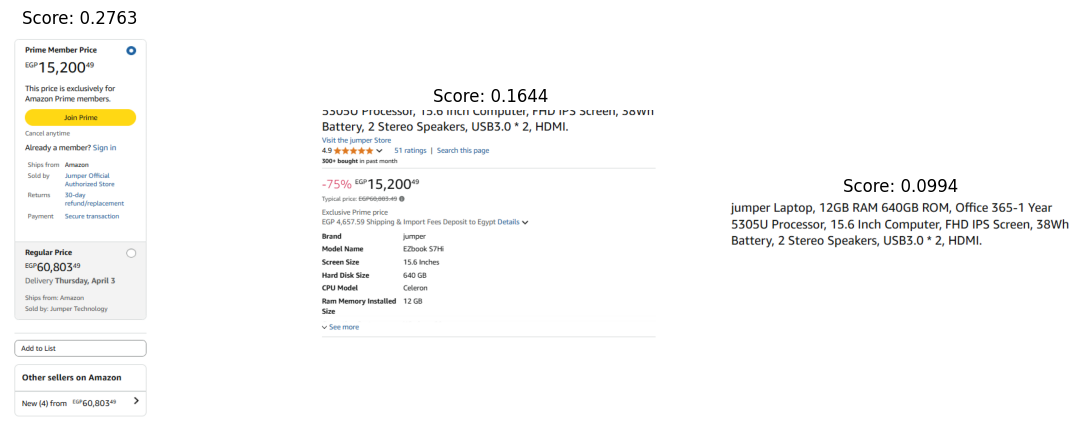

In [ ]:
queries = ["What does a price look like?"]
instruction = "Represent this query for retrieving relevant documents: "
prompt(queries, instruction, batches_lp, k=3)

Similarity scores: [[0.20012594759464264, -0.06069120019674301, 0.1016770601272583, 0.15488532185554504, 0.1353277713060379]]
Top 3 relevant document pages are at indices: [0 3 4]


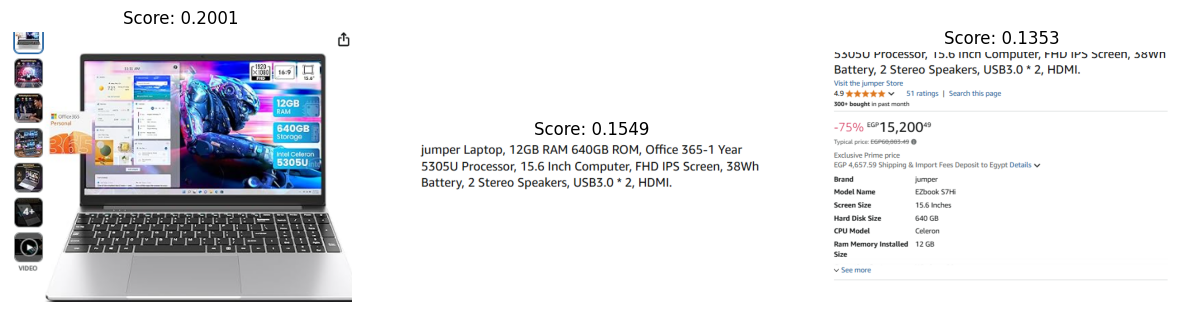

In [ ]:
prompt(["where is a ram memory installed ?"], instruction, batches_lp, k=3)

Similarity scores: [[0.08684945106506348, -0.051771990954875946, 0.13570663332939148, 0.07467439025640488, 0.1373254656791687]]
Top 3 relevant document pages are at indices: [4 2 0]


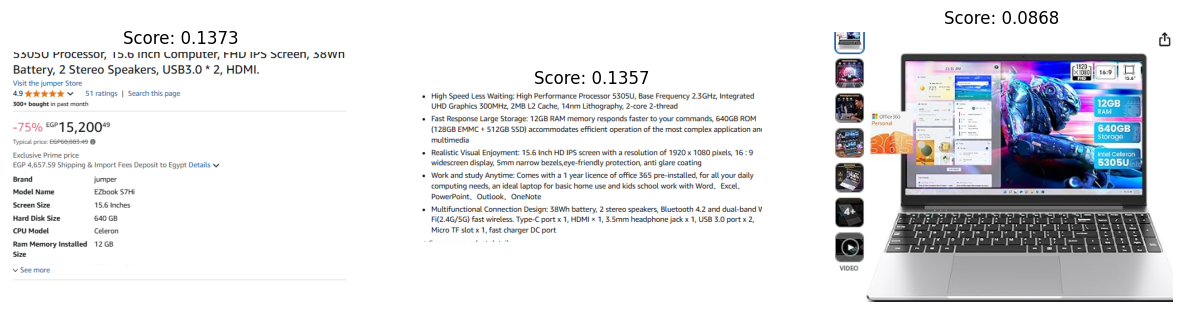

In [ ]:
prompt(["where is the screen resolution ?"], instruction, batches_lp, k=3)

Similarity scores: [[-0.011674230918288231, 0.016080114990472794, 0.051970306783914566, -0.08859667181968689, 0.060340553522109985, 0.006752355955541134, -0.015483793802559376, 0.008468651212751865, 0.03136458247900009]]
Top 3 relevant document pages are at indices: [4 2 8]


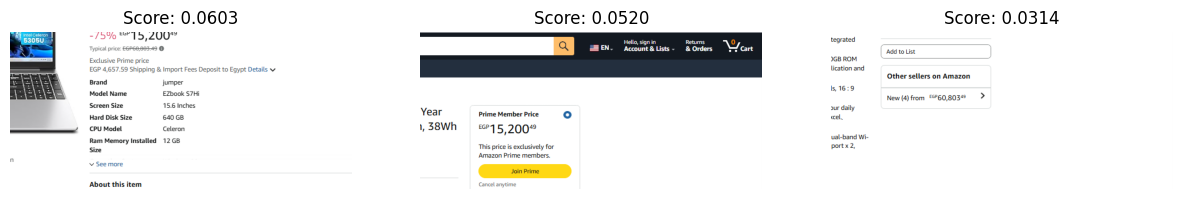

In [ ]:
prompt(["where is the price ?"], instruction, batches_f, k=3)

In [ ]:
#prompt(["where is the price ?"], instruction, batches_ocr, k=3)